In [1]:
import pandas as pd
import numpy as np
import analyzer as ana
import plotter as ptr

# Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.dates as mdates

# rc('text', usetex=True)
# rc('text.latex', preamble=r'\usepackage{cmbright}')
# rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

# Magic function to make matplotlib inline;
%matplotlib inline

# This enables SVG graphics inline. 
# There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
df = pd.read_csv('../test_data/cgal_2e.csv')

In [3]:
df.head()

,5x,10x,15x,20x
0,4394.543,11501.270,6889.289,4850.709
1,2712.312,9605.224,5736.894,9197.715
2,5088.852,9024.504,17054.700,17444.170
3,4803.957,12325.040,12119.980,7441.878
4,3128.796,11850.040,6892.424,7201.897


In [4]:
df = pd.melt(df, var_name='UAS copy number', value_name='Fluorescence')

In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,UAS copy number,Fluorescence
0,5x,4394.543
1,5x,2712.312
2,5x,5088.852
3,5x,4803.957
4,5x,3128.796


In [7]:
df.tail()

,UAS copy number,Fluorescence
322,20x,7105.090
323,20x,11224.410
324,20x,8231.048
325,20x,12003.630
326,20x,8070.131


In [8]:
p_vals = ana.calculate_pvalues(df, blabel='UAS copy number', mlabel='Fluorescence', n=10**5, f=np.mean)

#8 cores detected for this machine.
#Starting 8 processes for bootstrapping...
#Bootstrapping complete.

#P-value matrix:
          5x      10x      15x  20x
5x       NaN      NaN      NaN  NaN
10x  0.00001      NaN      NaN  NaN
15x  0.00001  0.00351      NaN  NaN
20x  0.00001  0.02492  0.11631  NaN



In [9]:
q_vals = ana.calculate_qvalues(p_vals)

#Q-value matrix:
          5x       10x      15x  20x
5x       NaN       NaN      NaN  NaN
10x  0.00006       NaN      NaN  NaN
15x  0.00006  0.005265      NaN  NaN
20x  0.00006  0.029904  0.11631  NaN


#Plotting heatmap


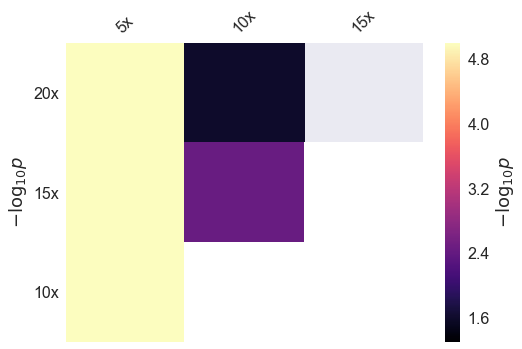

In [15]:
ptr.plot_heatmap(df, p_vals, 'UAS copy number', 'Fluorescence', 0.05, f=np.mean, ylabel='$-\log_{10}p$')

#Plotting heatmap


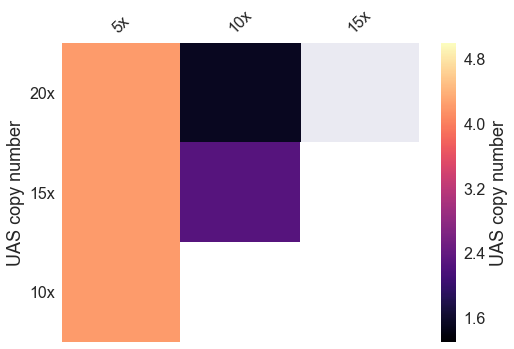

In [11]:
ptr.plot_heatmap(df, q_vals, 'UAS copy number', 'Fluorescence', 0.05, f=np.mean)

#Plotting jitterplot


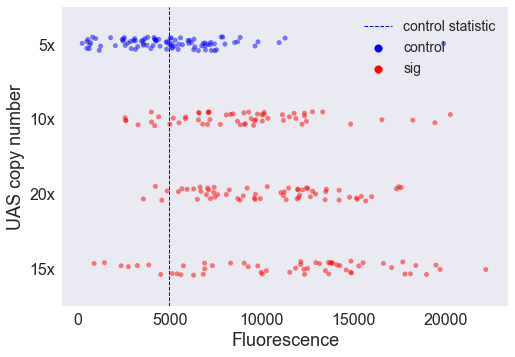

In [12]:
palette = {'sig': 'red',
                    'non-sig': 'grey',
                    'control': 'blue'}
jitter_kwargs = {'hue': 'sig',
                        'jitter': True,
                        'alpha': 0.5,
                        'palette': palette}

ptr.plot_jitterplot(df, p_vals, '5x','UAS copy number', 'Fluorescence', 0.05, f=np.mean, **jitter_kwargs)

#Plotting boxplot


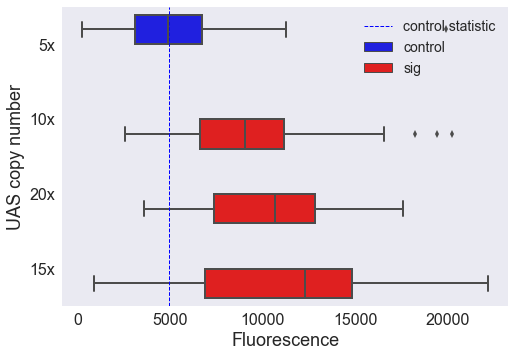

In [13]:
boxplot_kwargs = {'hue': 'sig',
                            'palette': palette}

ptr.plot_boxplot(df, p_vals, '5x','UAS copy number', 'Fluorescence', 0.05, f=np.mean, **boxplot_kwargs)

In [14]:
from scipy.stats import ttest_ind
ttest_ind(df[df['UAS copy number'] == '5x']['Fluorescence'], df[df['UAS copy number'] == '10x']['Fluorescence'], equal_var=False)[1]/2

5.2463167097684589e-10